<a href="https://colab.research.google.com/github/tankTopTaro/TensorFlow-Colab-Notebooks/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression

A regression problem refers **to the task of modeling one or more dependent variables using a set of predictor variables**.



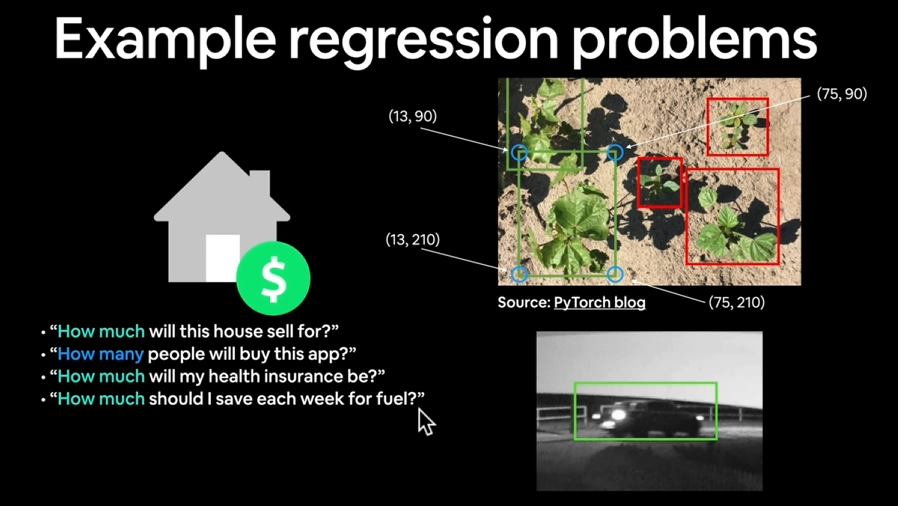

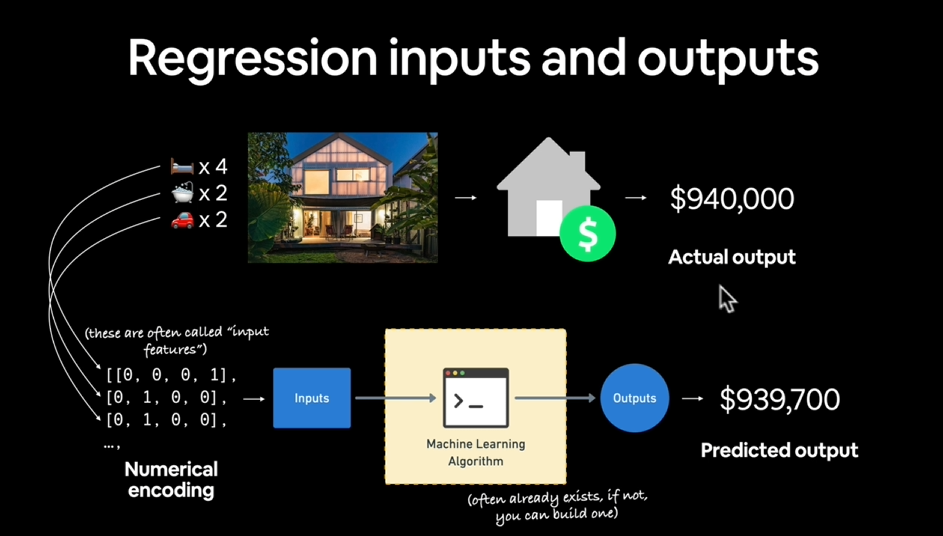

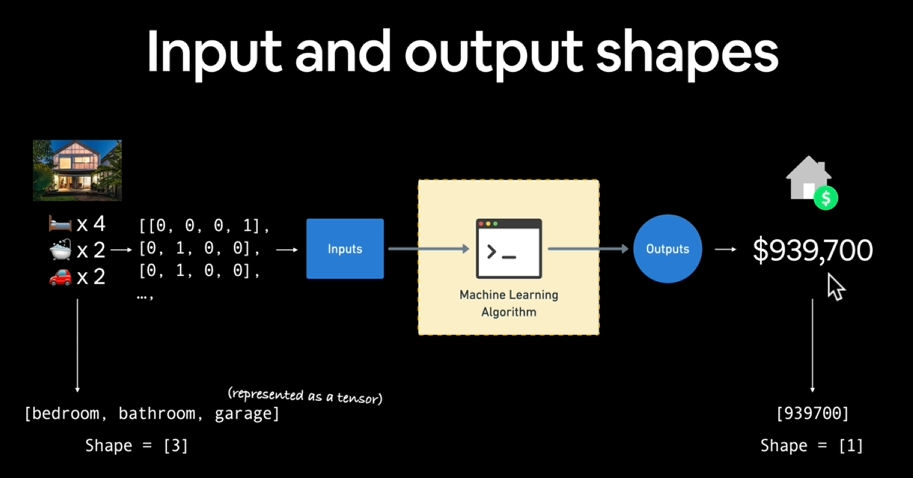

### Anatomy & Architecture of Neural Networks

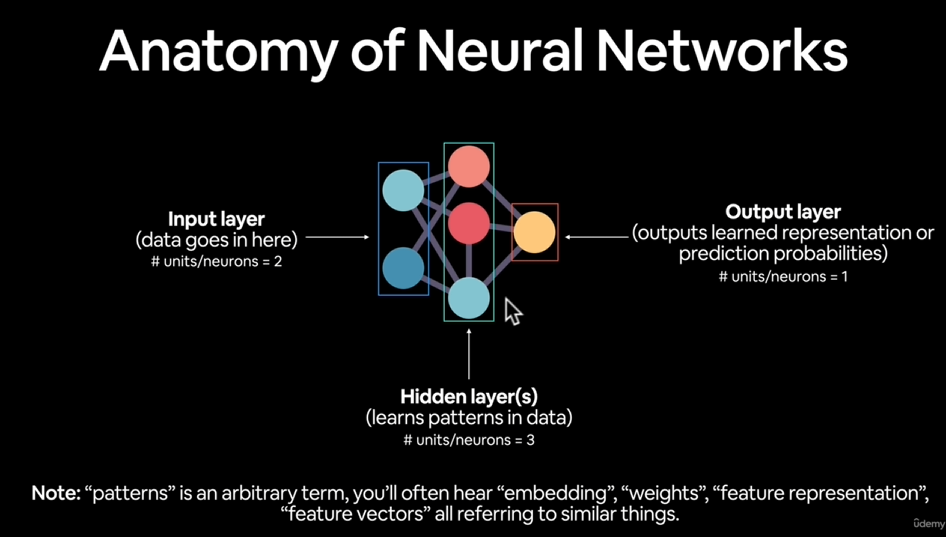

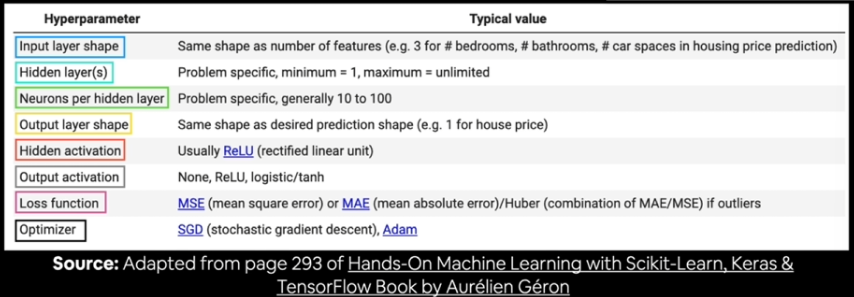

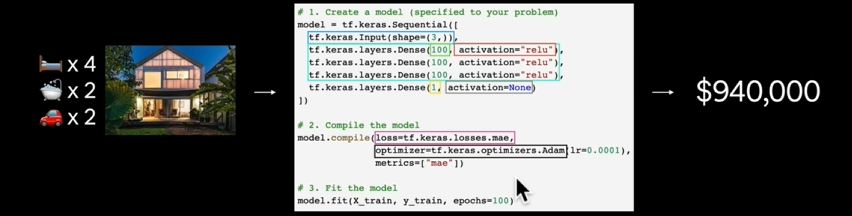

### Creating data to view and fit

In [1]:
# Import TensorFlow, NumPy, Matplotlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

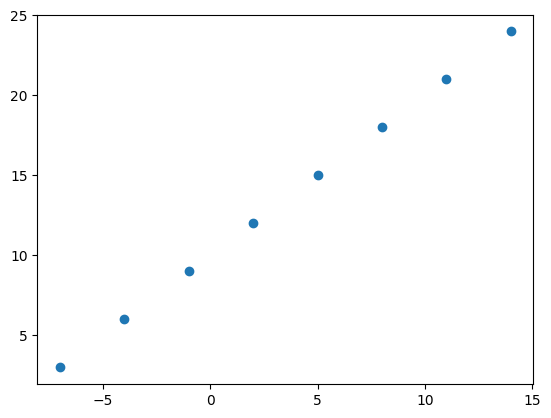

In [2]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [4]:
# Create a demo tensor for a housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
print("X shape:", X[0].shape)
print("y shape:", y[0].shape)

X shape: ()
y shape: ()


In [7]:
X[0].ndim

0

In [8]:
# Turn the NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

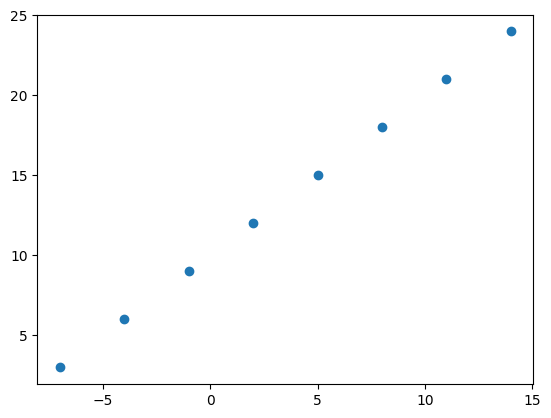

In [10]:
plt.scatter(X, y)

### Steps in modelling with TensorFlow

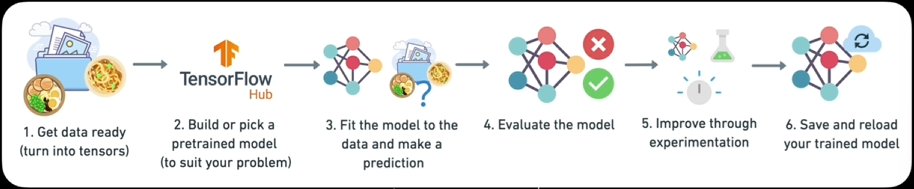

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model   -- define input, output and hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [12]:
# 2. Compile the model  -- define the loss function, the optimizer, and evaluation metrics
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [13]:
# 3. Fitting the model  -- letting the model find patterns between X & y (features and labels)
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 15.4220 - mae: 15.4220
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 15.1408 - mae: 15.1408
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 14.8989 - mae: 14.8989
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 14.7664 - mae: 14.7664
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 14.6339 - mae: 14.6339


In [14]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make prediction using the model
y_pred = model.predict(np.array([17.]).reshape(1, 1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[-5.037322]], dtype=float32)

In [16]:
y_pred + 15

array([[9.962678]], dtype=float32)

### Improving the model

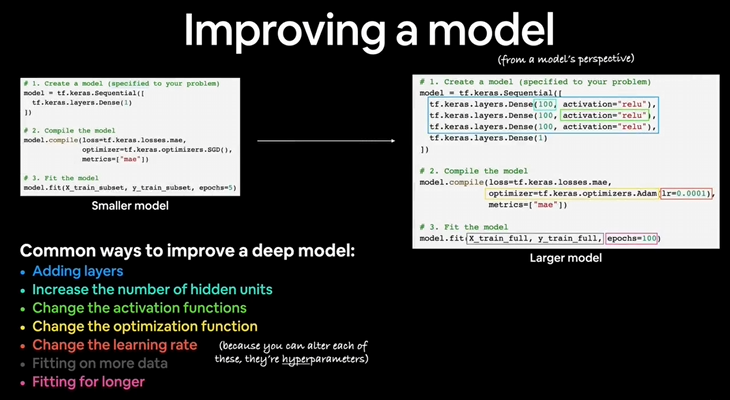

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Train for longer
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.7913 - mae: 13.7913
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - loss: 13.6588 - mae: 13.6588
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 13.5263 - mae: 13.5263
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 13.3938 - mae: 13.3938
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 13.2613 - mae: 13.2613
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - loss: 13.1288 - mae: 13.1288
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 12.9963 - mae: 12.9963
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 12.8638 - mae: 12.8638
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - loss: 12.7313 - mae: 12.7313
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - loss: 12.5988 - mae: 12.5988
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 12.4663 - mae: 12.4663
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 12.3338 - mae: 12.3338
Epoch 13/100
1/1 ━

In [18]:
y_pred = model.predict(np.array([17.]).reshape(1, 1))
X, y, y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 array([[29.80754]], dtype=float32))

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Change the optimizer
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

# Train for longer
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 969ms/step - loss: 12.3197 - mae: 12.3197
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 12.3192 - mae: 12.3192
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.3188 - mae: 12.3188
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.3183 - mae: 12.3183
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.3179 - mae: 12.3179
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.3174 - mae: 12.3174
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 12.3170 - mae: 12.3170
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.3165 - mae: 12.3165
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.3161 - mae: 12.3161
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 12.3156 - mae: 12.3156
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.3152 - mae: 12.3152
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 12.3147 - mae: 12.3147
Epoch 13/100
1/1 ━━━━━━━

In [20]:
y_pred = model.predict(np.array([17.]).reshape(1, 1))
X, y, y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 array([[5.91301]], dtype=float32))

In [21]:
# Add more layers
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# Change the optimizer or learning rate
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Train for longer
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step - loss: 14.3087 - mae: 14.3087
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 13.5773 - mae: 13.5773
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.8530 - mae: 12.8530
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.1339 - mae: 12.1339
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.4172 - mae: 11.4172
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.7005 - mae: 10.7005
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.9813 - mae: 9.9813
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.2567 - mae: 9.2567
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.5239 - mae: 8.5239
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.7797 - mae: 7.7797
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.0211 - mae: 7.0211
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.6864 - mae: 6.6864
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [22]:
y_pred = model.predict(np.array([17.]).reshape(1, 1))
X, y, y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 array([[27.250925]], dtype=float32))

### Evaluating the model

In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

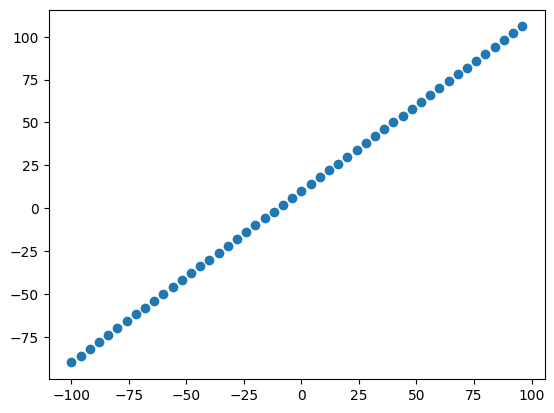

In [25]:
plt.scatter(X, y)

### The 3 sets...
* __Traninng set__ — the model learns from this data, which is typically 70-80% of the total data you have available.
* __Validation set__ — the model gets tuned on this data, which is 10-15% of the data available.
* __Test set__ — the model gets evaluated on this data to test what it has learned, this set is 10-15% of the total data available.

In [26]:
len(X), len(y)

(50, 50)

In [27]:
# Split the data to train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data

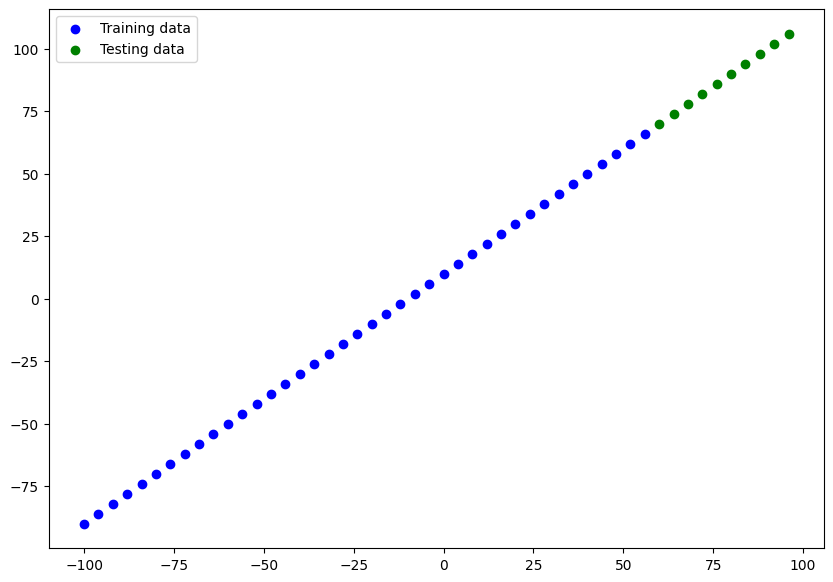

In [28]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()

In [60]:
# Add more layers
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# Change the optimizer or learning rate
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Train for longer
model.fit(X, y, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 51.1147 - mae: 51.1147
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 34.5930 - mae: 34.5930
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.6481 - mae: 18.6481 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6983 - mae: 9.6983 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.4442 - mae: 13.4442
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.8202 - mae: 16.8202  
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.5735 - mae: 14.5735
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.0216 - mae: 10.0216
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.7371 - mae: 8.7371 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.7648 - mae: 8.7648
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.4551 - mae: 10.4551
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.1227 - mae: 10.1227 
Epoch 13/100
2/2 ━━━━━━━━━━━━

### Visualizing the model

In [61]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

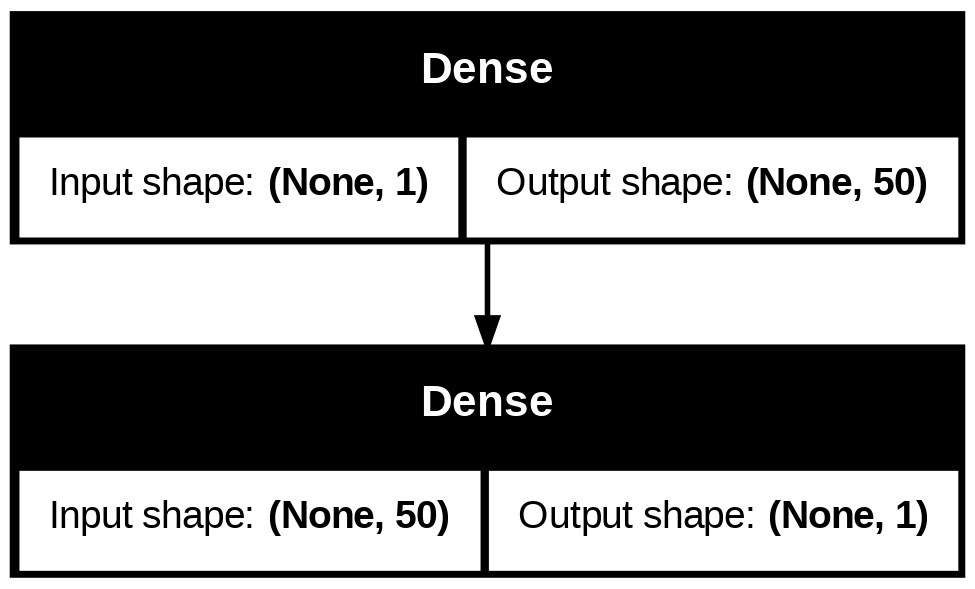

In [62]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing model's predictions

In [63]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[ 68.94854 ],
       [ 72.879845],
       [ 76.811165],
       [ 80.74248 ],
       [ 84.673775],
       [ 88.605095],
       [ 92.53639 ],
       [ 96.4677  ],
       [100.399   ],
       [104.33032 ]], dtype=float32)

In [64]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [65]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

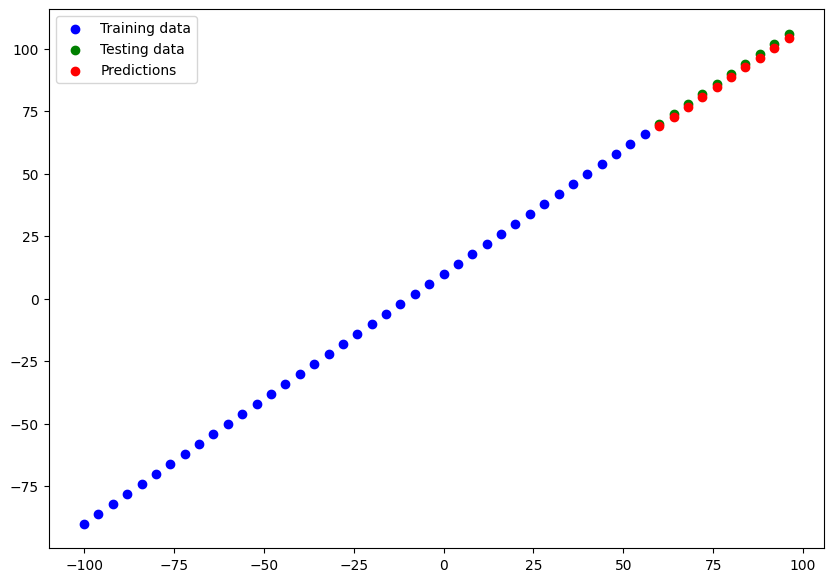

In [66]:
plot_predictions()

### Evaluate the model's predictions

In [67]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 1.3606 - mae: 1.3606


[1.3605690002441406, 1.3605690002441406]

In [68]:
# Calculate the Mean Absolute Error
mae = tf.metrics.mae(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.0514603, 1.1201553, 1.1888351, 1.2575226, 1.3262253, 1.3949051,
       1.4636078, 1.5323029, 1.6009979, 1.6696777], dtype=float32)>

In [69]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 68.94854 ],
       [ 72.879845],
       [ 76.811165],
       [ 80.74248 ],
       [ 84.673775],
       [ 88.605095],
       [ 92.53639 ],
       [ 96.4677  ],
       [100.399   ],
       [104.33032 ]], dtype=float32)>

In [70]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 68.94854 ,  72.879845,  76.811165,  80.74248 ,  84.673775,
        88.605095,  92.53639 ,  96.4677  , 100.399   , 104.33032 ],
      dtype=float32)>

In [71]:
mae = tf.metrics.mae(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.360569>

In [72]:
# Calculate the Mean Square Error
mse = tf.metrics.mse(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.890076>

In [73]:
# Create a function that reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mae(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mse(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve the model

In [74]:
# Model_1 - same as original model, 1 layer, trained for 100 epochs
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 36.3521 - mae: 36.3521 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.9024 - mae: 8.9024 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8531 - mae: 7.8531 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.8142 - mae: 10.8142 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6578 - mae: 7.6578 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.9855 - mae: 11.9855 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1678 - mae: 8.1678 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.7124 - mae: 8.7124 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5791 - mae: 8.5791 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3460 - mae: 8.3460 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0911 - mae: 9.0911 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1605 - mae: 8.1605 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


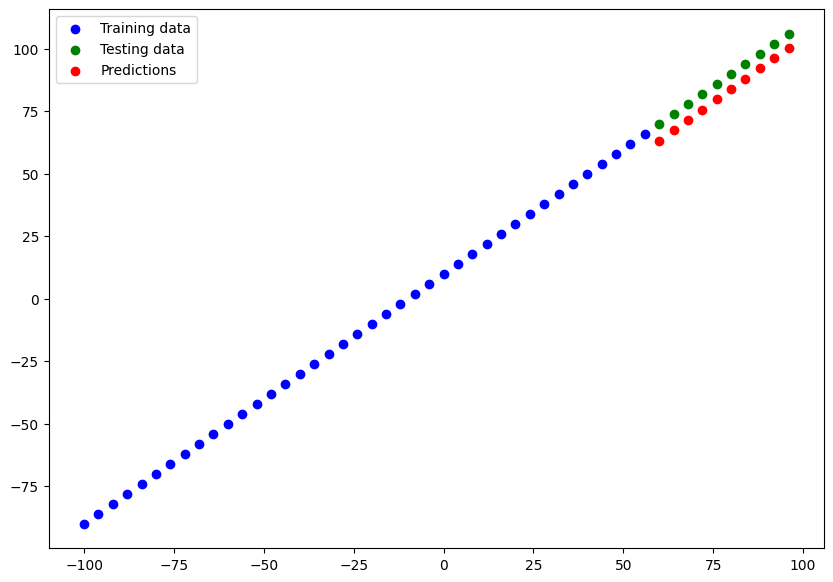

In [75]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=tf.squeeze(y_pred_1))

In [76]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=6.181849>,
 <tf.Tensor: shape=(), dtype=float32, numpy=38.341015>)

In [77]:
# Model_2 - 2 layers, trained for 100 epochs
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1,], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# Change the optimizer or learning rate
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

# Train for longer
model_2.fit(X_train, y_train, epochs=100, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


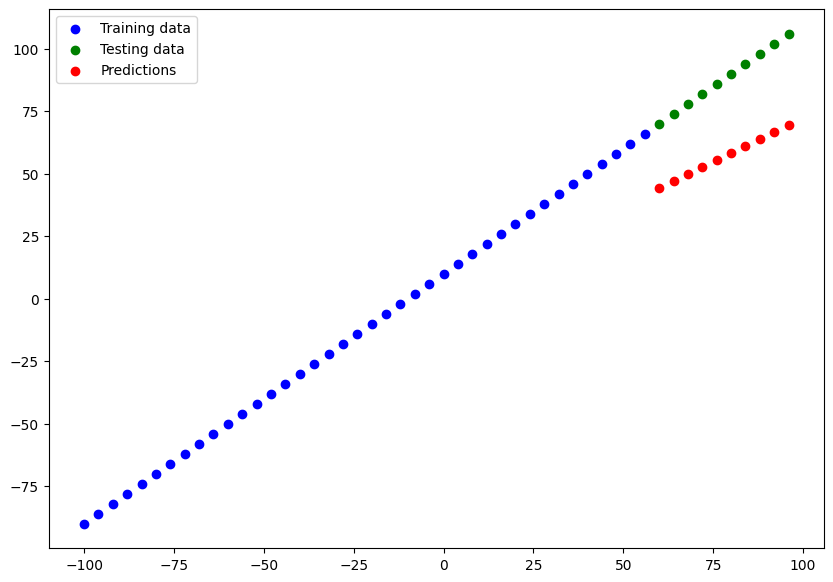

In [78]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [79]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=31.105331>,
 <tf.Tensor: shape=(), dtype=float32, numpy=979.2152>)

In [80]:
# Model_3 - 2 layers, trained for 500 epochs
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 44.3958 - mae: 44.3958 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24.8870 - mae: 24.8870 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.7513 - mae: 19.7513 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.5807 - mae: 17.5807 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.5203 - mae: 16.5203 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.4512 - mae: 11.4512 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.2540 - mae: 15.2540 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.0139 - mae: 16.0139 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.0125 - mae: 12.0125 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.0036 - mae: 15.0036 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.0542 - mae: 11.0542 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.8969 - mae: 14.8969 
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


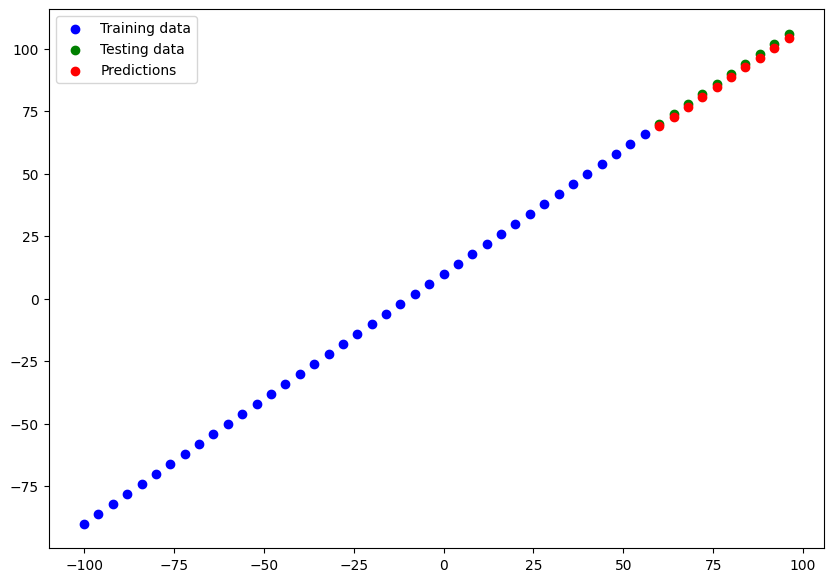

In [81]:
y_pred_3 = model.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [82]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.360569>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.890076>)

### Comparing the results of the experiments

In [84]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,6.181849,38.341015
1,model_2,31.105331,979.215210
2,model_3,1.360569,1.890076


### Tracking experiments

📖 **Resource:**
  * [__TensorBoard__](https://www.tensorflow.org/tensorboard)
  * [__Weights & Biases__](https://wandb.ai/site)

### Saving the models

In [90]:
# SavedModel format
tf.saved_model.save(model_3, "saved_model")

In [91]:
# HDF5 format
tf.keras.models.save_model(model_3, "h5_model.h5")

In [93]:
# Keras format
model_3.save("keras_model.keras")

### Loading the saved model

In [99]:
load_savedmodel_format = tf.saved_model.load("/content/saved_model")
load_savedmodel_format.signatures

_SignatureMap({'serving_default': <ConcreteFunction (*, inputs: TensorSpec(shape=(None, 1), dtype=tf.float32, name='inputs')) -> Dict[['output_0', TensorSpec(shape=(None, 1), dtype=tf.float32, name='output_0')]] at 0x7BCD56771F00>})

In [100]:
load_h5_format = tf.keras.models.load_model("/content/h5_model.h5")
load_h5_format.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [101]:
load_keras_format = tf.keras.models.load_model("/content/keras_model.keras")
load_keras_format.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64 (260.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33 (136.00 B)

In [103]:
model_3_preds = model_3.predict(X_test)
load_keras_format_preds = load_keras_format.predict(X_test)

model_3_preds == load_keras_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [104]:
# Downloading model
from google.colab import files
files.download('/content/keras_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# A larger example


In [105]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [108]:
insurance['sex'], insurance['age']

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

💡[How to one hot encode Pandas dataframe](https://www.kdnuggets.com/2023/07/pandas-onehot-encode-data.html)

In [113]:
# One-hot encode the dataframe
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [114]:
# Create X & y values (features & labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [115]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [116]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [117]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [121]:
# Build a neural network
tf.random.set_seed(42)

# Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[11,]),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10078.8428 - mae: 10078.8428
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7639.6528 - mae: 7639.6528
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7556.5859 - mae: 7556.5859
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7976.7959 - mae: 7976.7959
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7394.8726 - mae: 7394.8726
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7628.9966 - mae: 7628.9966
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7607.3247 - mae: 7607.3247
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7288.5186 - mae: 7288.5186
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7553.0869 - mae: 7553.0869
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7342.1968 - mae: 7342.1968
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7426.9453 - mae: 7426.9453
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78

In [122]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6265.0293 - mae: 6265.0293  


[6124.7275390625, 6124.7275390625]

In [125]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

### Improving the model


In [131]:
# Add layers with more hidden units
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[11,]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Change the optimizer
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [132]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5344.1714 - mae: 5344.1714  


[5175.6064453125, 5175.6064453125]

In [133]:
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[11,]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# Train for longer
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3485.9727 - mae: 3485.9727  


[3417.754150390625, 3417.754150390625]

Text(0.5, 0, 'epochs')

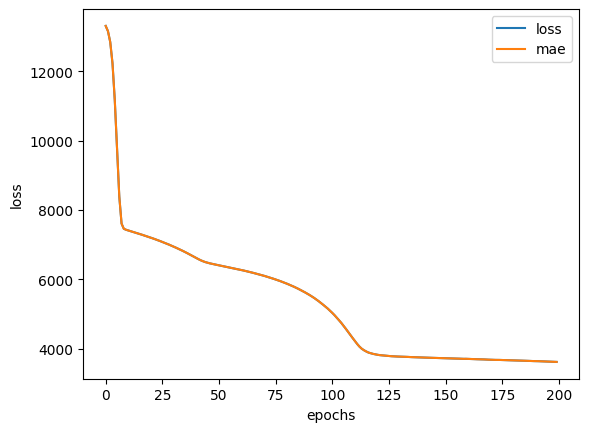

In [135]:
# Plot history (loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

📖 [__EarlyStopping Callback__](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

### Preprocessing Data (normalization & standardization)

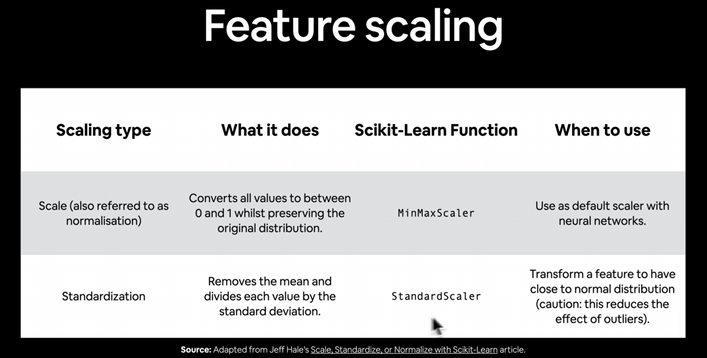

In [136]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

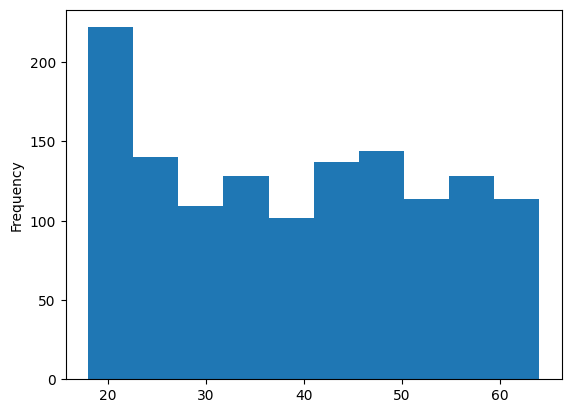

In [137]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

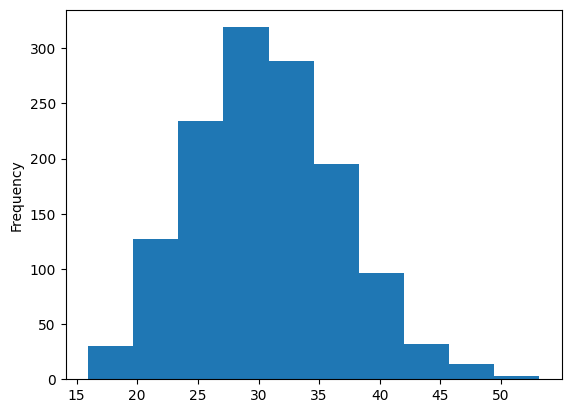

In [138]:
X["bmi"].plot(kind="hist")

<Axes: ylabel='Frequency'>

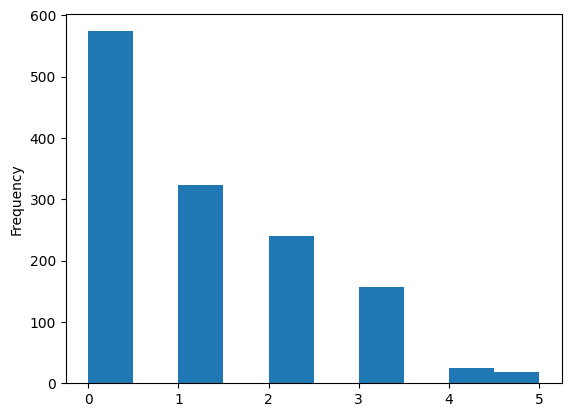

In [139]:
X["children"].plot(kind="hist")

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [146]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ['sex', 'smoker', 'region'])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer on the training data
ct.fit(X_train)

# Transform train and test data with normalization and one-hot encoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [148]:
# Visualize
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [150]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [151]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

### Building model using normalized data

In [155]:
insurance_model_2.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

In [160]:
normalized_insurance = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[11]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

normalized_insurance.compile(loss=tf.keras.losses.mae,
                             optimizer=tf.keras.optimizers.Adam(),
                             metrics=['mae'])

normalized_history = normalized_insurance.fit(X_train_normal, y_train, epochs=200, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [161]:
normalized_insurance.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3213.9241 - mae: 3213.9241  


[3161.1953125, 3161.1953125]

Text(0.5, 1.0, 'normalized_history')

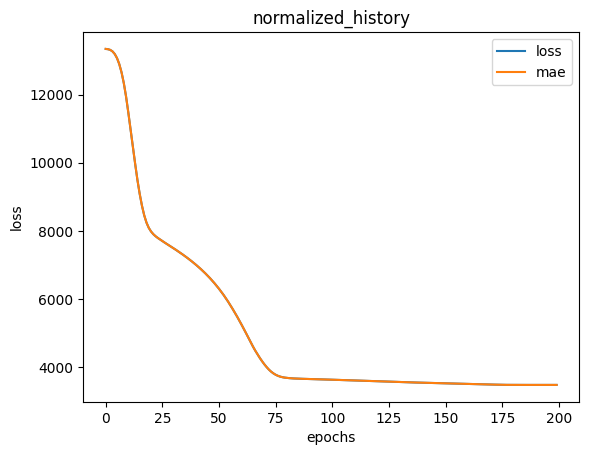

In [163]:
# Plot history (loss curve)
pd.DataFrame(normalized_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("normalized_history")

Text(0.5, 1.0, 'history')

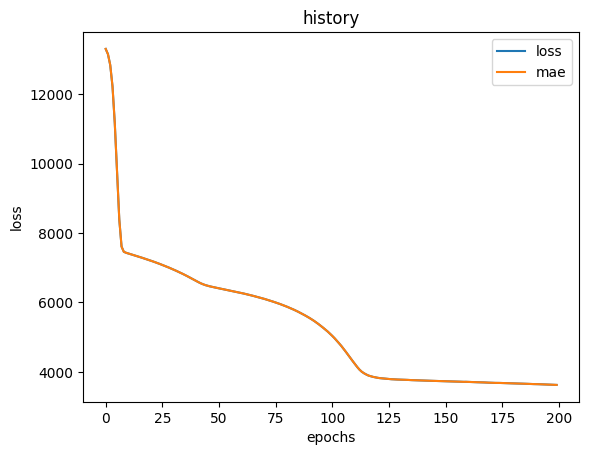

In [164]:
# Plot history (loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("history")